# Validation using DIGEST

Notebook to recreate the results presented in the paper. Keep in mind, that the results can slighty differentiate as the random background will not create the exact same random sets as before. 

## Setup

In [1]:
import os
import sys
import json
import pandas as pd
from IPython.display import IFrame
# ==== import single validation script ====
from pathlib import Path
sys.path.append(str(Path.cwd().parent))
from single_validation import single_validation, save_results
from d_utils.plotting_utils import create_plots

/home/kikky/.local/lib/python3.8/site-packages/scipy/sparse/sputils.py:114: UserWarning: object dtype is not supported by sparse matrices
  warnings.warn("object dtype is not supported by sparse matrices")
/home/kikky/.local/lib/python3.8/site-packages/scipy/sparse/sputils.py:114: UserWarning: object dtype is not supported by sparse matrices
  warnings.warn("object dtype is not supported by sparse matrices")


## Cluster itself

Compare a target cluster of diseases or genes based on dunn index, sillhouette score or david bouldin index, while the random runs are simply cluster size preserving perturbation of cluster assignments.

## Gene Cluster

### Set input parameters

In [2]:
# ==== define required input ====
tar_set = "input/target_gene_cluster.txt"
tar_id_type = "symbol"
mode = "cluster"
# ==== define optional input ====
out_dir = "results/gene_cluster/" 
background_model="complete" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model
plot=True # create plots for vizualisation from results
verbose=True # printing additional information during the run
prefix="cluster_gene_symbol_complete"

### Run script

In [3]:
results = single_validation(tar=tar_set, tar_id=tar_id_type, mode=mode, background_model=background_model, 
                            runs=runs, replace=perc, verbose=verbose)

[00:00:00|152.33MB] Starting validation ...
[00:00:00|152.33MB] Load mappings for input into cache ...
[00:00:01|592.05MB] Load distances for input into cache ...
[00:00:09|2394.76MB] Load input data ...
[00:00:09|2395.02MB] Validation of input ...
Missing values for pathway.kegg :9/20
[00:00:09|2395.73MB] Validation of random runs ...
[00:03:33|2397.28MB] Finished validation


### Inspect results

Check all P-values

In [4]:
pd.DataFrame(results["p_values"]['values'])

,di,ss,dbi
go.BP,0.069930,0.344655,0.120879
go.CC,0.392607,1.000000,0.800200
go.MF,0.426573,1.000000,0.760240
pathway.kegg,0.364635,1.000000,0.658342


Check validation values of input cluster

In [5]:
pd.DataFrame(results["input_values"]['values'])

,di,ss,ss_inter,dbi
go.BP,0.097523,-0.700000,"{0: -0.8, 1: -0.6}",0.180988
go.CC,0.181698,-1.000000,"{0: -1.0, 1: -1.0}",1.835614
go.MF,0.184877,-0.900000,"{0: -1.0, 1: -0.8}",1.962328
pathway.kegg,0.279293,-0.909091,"{0: -1.0, 1: -0.8}",0.275175


### Save results

#### Save full results as json and upper two tables as csv

In [6]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

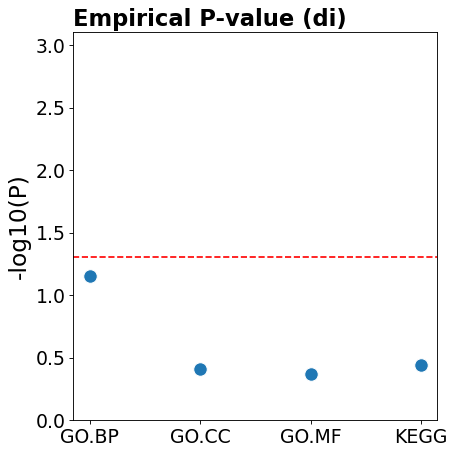

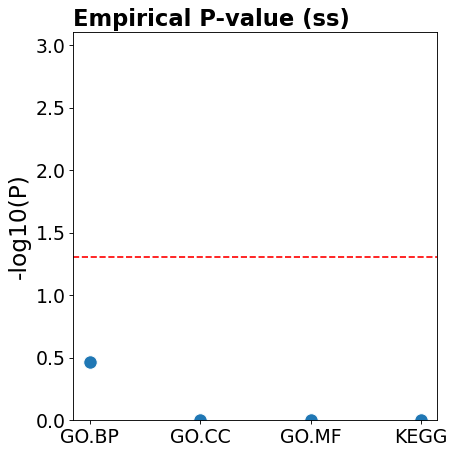

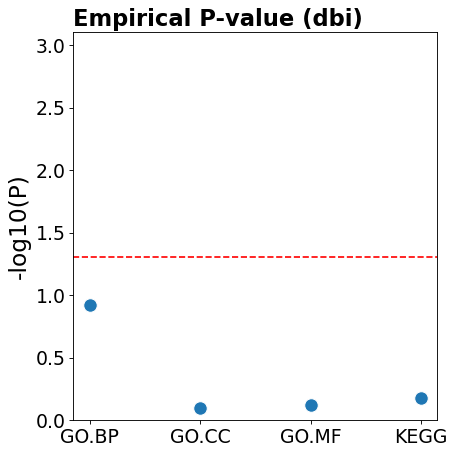

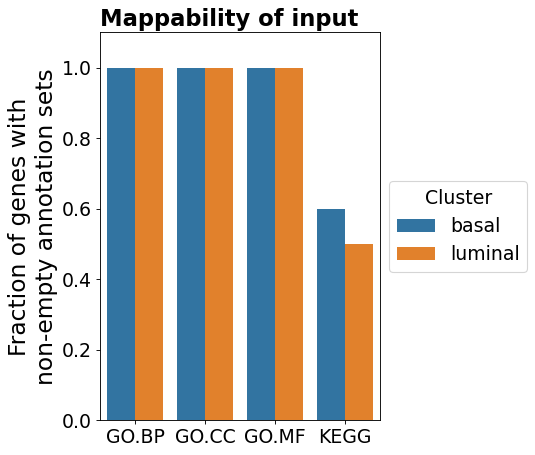

In [7]:
create_plots(results=results, mode=mode, tar=tar_set, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)

Keep in mind, that after plotting, the resulting plots are also saved in the output directory.

## Disease Cluster

### Set input parameters

In [10]:
# ==== define required input ====
tar_set = "input/target_disease_cluster.txt"
tar_id_type = "ICD-10"
mode = "cluster"
# ==== define optional input ====
out_dir = "results/disease_cluster/" 
background_model="complete" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model
plot=True # create plots for vizualisation from results
verbose=True # printing additional information during the run
prefix="cluster_disease_ICD-10_complete"

### Run script

In [11]:
results = single_validation(tar=tar_set, tar_id=tar_id_type, mode=mode, background_model=background_model, 
                            runs=runs, replace=perc, verbose=verbose)

[00:00:00|2397.36MB] Starting validation ...
[00:00:00|2397.36MB] Load mappings for input into cache ...
[00:00:01|2396.95MB] Load distances for input into cache ...
[00:00:02|2615.41MB] Load input data ...
[00:00:02|2615.41MB] Validation of input ...
Missing values for disgenet.genes_related_to_disease :2/64
Missing values for disgenet.variants_related_to_disease :7/64
Missing values for ctd.pathway_related_to_disease :18/64
[00:00:03|2619.62MB] Validation of random runs ...


KeyboardInterrupt: 

### Save results

#### Save results as json

In [7]:
with open(os.path.join(out_dir, prefix + "_result.json"), "w") as outfile:
        json.dump(results, outfile)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

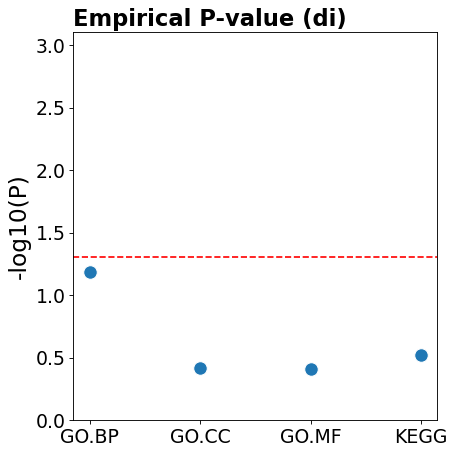

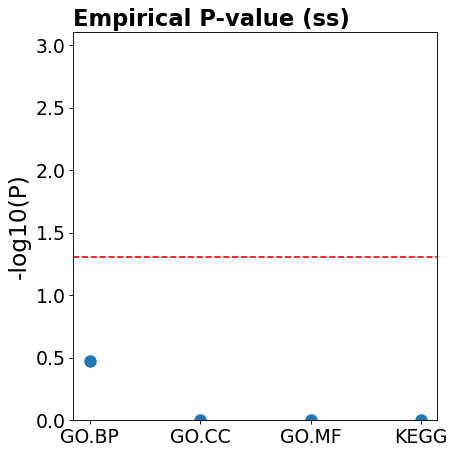

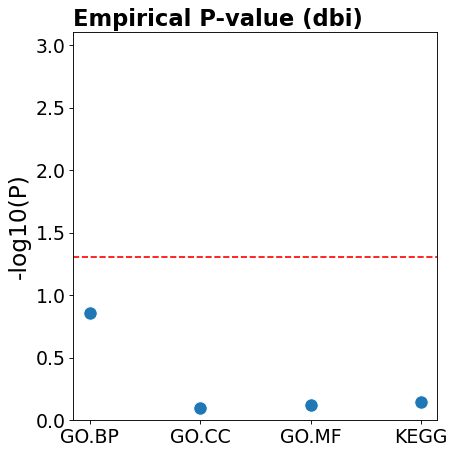

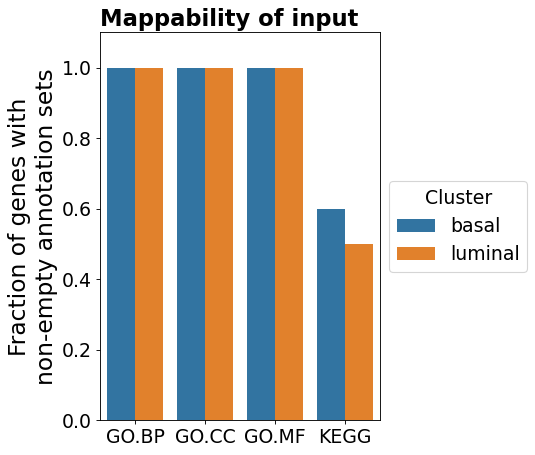

In [8]:
create_plots(results=results, mode=mode, tar=tar_set, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)

Keep in mind, that after plotting, the resulting plots are also saved in the output directory.

## Set itself

Validate a set by reference, either reference set or id, or reference-free. Two background models can be used. 

## Disease Set

### Set input parameters

In [2]:
# ==== define required input ====
tar_set = "input/target_disease_set.txt"
tar_id_type = "mesh"
mode = "set"
# ==== define optional input ====
out_dir = "results/disease_set/" 
background_model="term-pres" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model
plot=True # create plots for vizualisation from results
verbose=True # printing additional information during the run
prefix="set_disease_mesh_term-pres"

### Run script

In [3]:
results = single_validation(tar=tar_set, tar_id=tar_id_type, mode=mode, background_model=background_model, 
                            runs=runs, replace=perc, verbose=verbose)

[00:00:00|152.26MB] Starting validation ...
[00:00:00|152.26MB] Load mappings for input into cache ...
[00:00:01|590.60MB] Load distances for input into cache ...
[00:00:02|803.48MB] Validation of input ...
[00:00:02|804.32MB] Validation of random runs ...
[00:00:27|834.99MB] Calculating p-values ...
[00:00:27|834.99MB] Finished validation


### Inspect results

Check all P-values

In [4]:
pd.DataFrame(results["p_values"]['values'])

,set_value
ctd.pathway_related_to_disease,0.027972
disgenet.genes_related_to_disease,0.029970
disgenet.variants_related_to_disease,0.006993


Check validation values of input cluster

In [5]:
pd.DataFrame(results["input_values"]['values'])

,set_value
ctd.pathway_related_to_disease,2.738386
disgenet.genes_related_to_disease,1.188217
disgenet.variants_related_to_disease,0.200375


### Save results

#### Save full results as json and upper two tables as csv

In [6]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

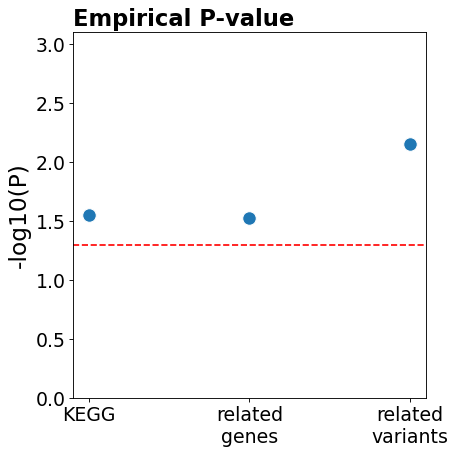

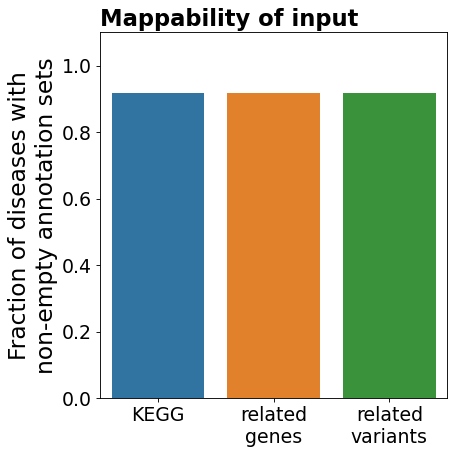

In [7]:
create_plots(results=results, mode=mode, tar=tar_set, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)

## Gene Set

### Set input parameters

In [11]:
# ==== define required input ====
tar_set = "input/target_gene_set.txt"
tar_id_type = "symbol"
ref_set = "input/reference_gene_set.txt"
ref_id_type = "symbol"
mode = "set-set"
# ==== define optional input ====
out_dir = "results/gene_set/" 
enriched=True # only enriched values of reference set are used
background_model="term-pres" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model
plot=True # create plots for vizualisation from results
verbose=True # printing additional information during the run
prefix="set-set_gene_symbol_term-pres"

### Run script

In [12]:
results = single_validation(tar=tar_set, tar_id=tar_id_type, ref=ref_set, ref_id=ref_id_type, mode=mode, 
                            runs=runs, background_model=background_model, verbose=verbose, enriched=enriched)

[00:00:00|894.59MB] Starting validation ...
[00:00:00|894.59MB] Load mappings for input into cache ...
[00:00:15|953.29MB] Validation of input ...
[00:00:15|953.29MB] Validation of random runs ...
[00:01:56|954.09MB] Calculating p-values ...
[00:01:56|954.09MB] Finished validation


### Inspect results

Check all P-values

In [13]:
pd.DataFrame(results["p_values"]['values'])

,set_value
go.BP,0.000999
go.CC,0.000999
go.MF,0.010989
pathway.kegg,1.000000


Check validation values of input cluster

In [14]:
pd.DataFrame(results["input_values"]['values'])

,set_value
go.BP,0.625
go.CC,0.65
go.MF,0.35
pathway.kegg,0.0


### Save results

#### Save full results as json and upper two tables as csv

In [16]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

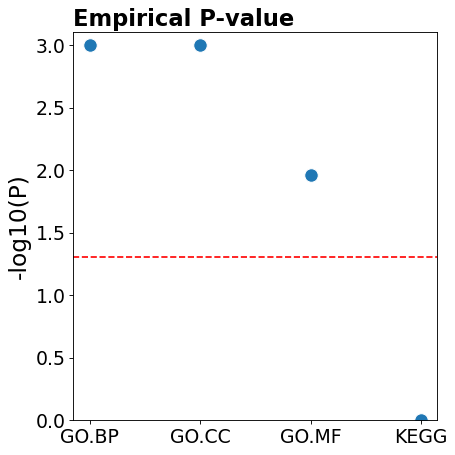

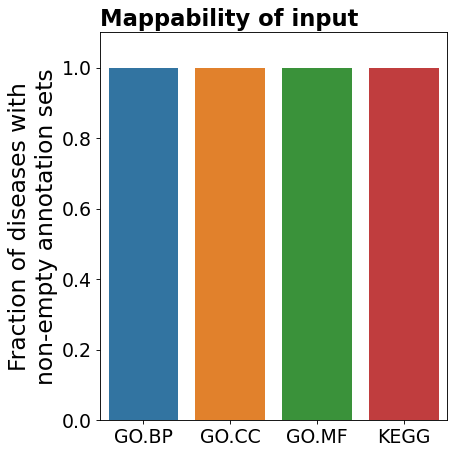

In [17]:
create_plots(results=results, mode=mode, tar=tar_set, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)